In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

In [4]:
airline=pd.read_csv('C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 7/EastWestAirlines.csv')
airline.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [16]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline1=airline.drop(['ID'],axis=1)
airline1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
scaler=StandardScaler()
scaler.fit(airline1)
airline_scale=scaler.fit_transform(airline1)
airline_scale

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [47]:
dbscan=DBSCAN(eps=0.8,min_samples=12)
dbscan.fit(airline_scale)

DBSCAN(eps=0.8, min_samples=12)

In [48]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
column=pd.DataFrame(dbscan.labels_,columns=['clusterid'])
column

,clusterid
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [50]:
airline_new=pd.concat([airline,column],axis=1)
airline_new

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [51]:
airline_new.sort_values('clusterid')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
1655,1671,239576,0,3,1,1,13301,12,0,0,4849,1,-1
2591,2610,211773,0,3,1,1,23256,30,0,0,2675,0,-1
839,850,119932,0,3,1,1,22463,26,5177,11,6077,1,-1
841,852,77109,0,5,1,1,60000,7,0,0,6071,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2753,162840,0,5,1,1,57382,15,0,0,2277,0,4
2500,2519,215155,0,5,1,1,57130,15,0,0,3069,0,4
3293,3316,162365,0,5,1,1,65029,15,0,0,1948,0,4
3148,3170,89094,0,5,1,1,55865,13,0,0,2404,0,4


In [52]:
airline_new.groupby('clusterid').agg('mean').reset_index()

,clusterid,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1,1742.464803,153643.480331,592.975155,2.685300,1.060041,1.050725,34663.012422,19.590062,1587.557971,4.595238,4655.547619,0.628364
1,0,2204.926395,46273.354430,0.703235,1.556493,1.000000,1.000000,7397.959212,7.789498,80.463197,0.279419,3753.015940,0.000000
2,1,1897.855055,47313.197320,2.436054,2.347138,1.000000,1.000000,17414.952497,11.605359,157.247259,0.532278,4338.215591,1.000000
3,2,1063.396226,88517.735849,0.000000,5.000000,1.000000,1.000000,64327.037736,17.735849,80.301887,0.339623,5806.056604,1.000000
4,3,1334.000000,143829.166667,0.000000,5.000000,1.000000,1.000000,62086.083333,16.083333,58.166667,0.166667,5285.250000,0.000000
5,4,2887.642857,139251.214286,0.000000,5.000000,1.000000,1.000000,60420.071429,14.000000,35.714286,0.071429,2489.857143,0.000000


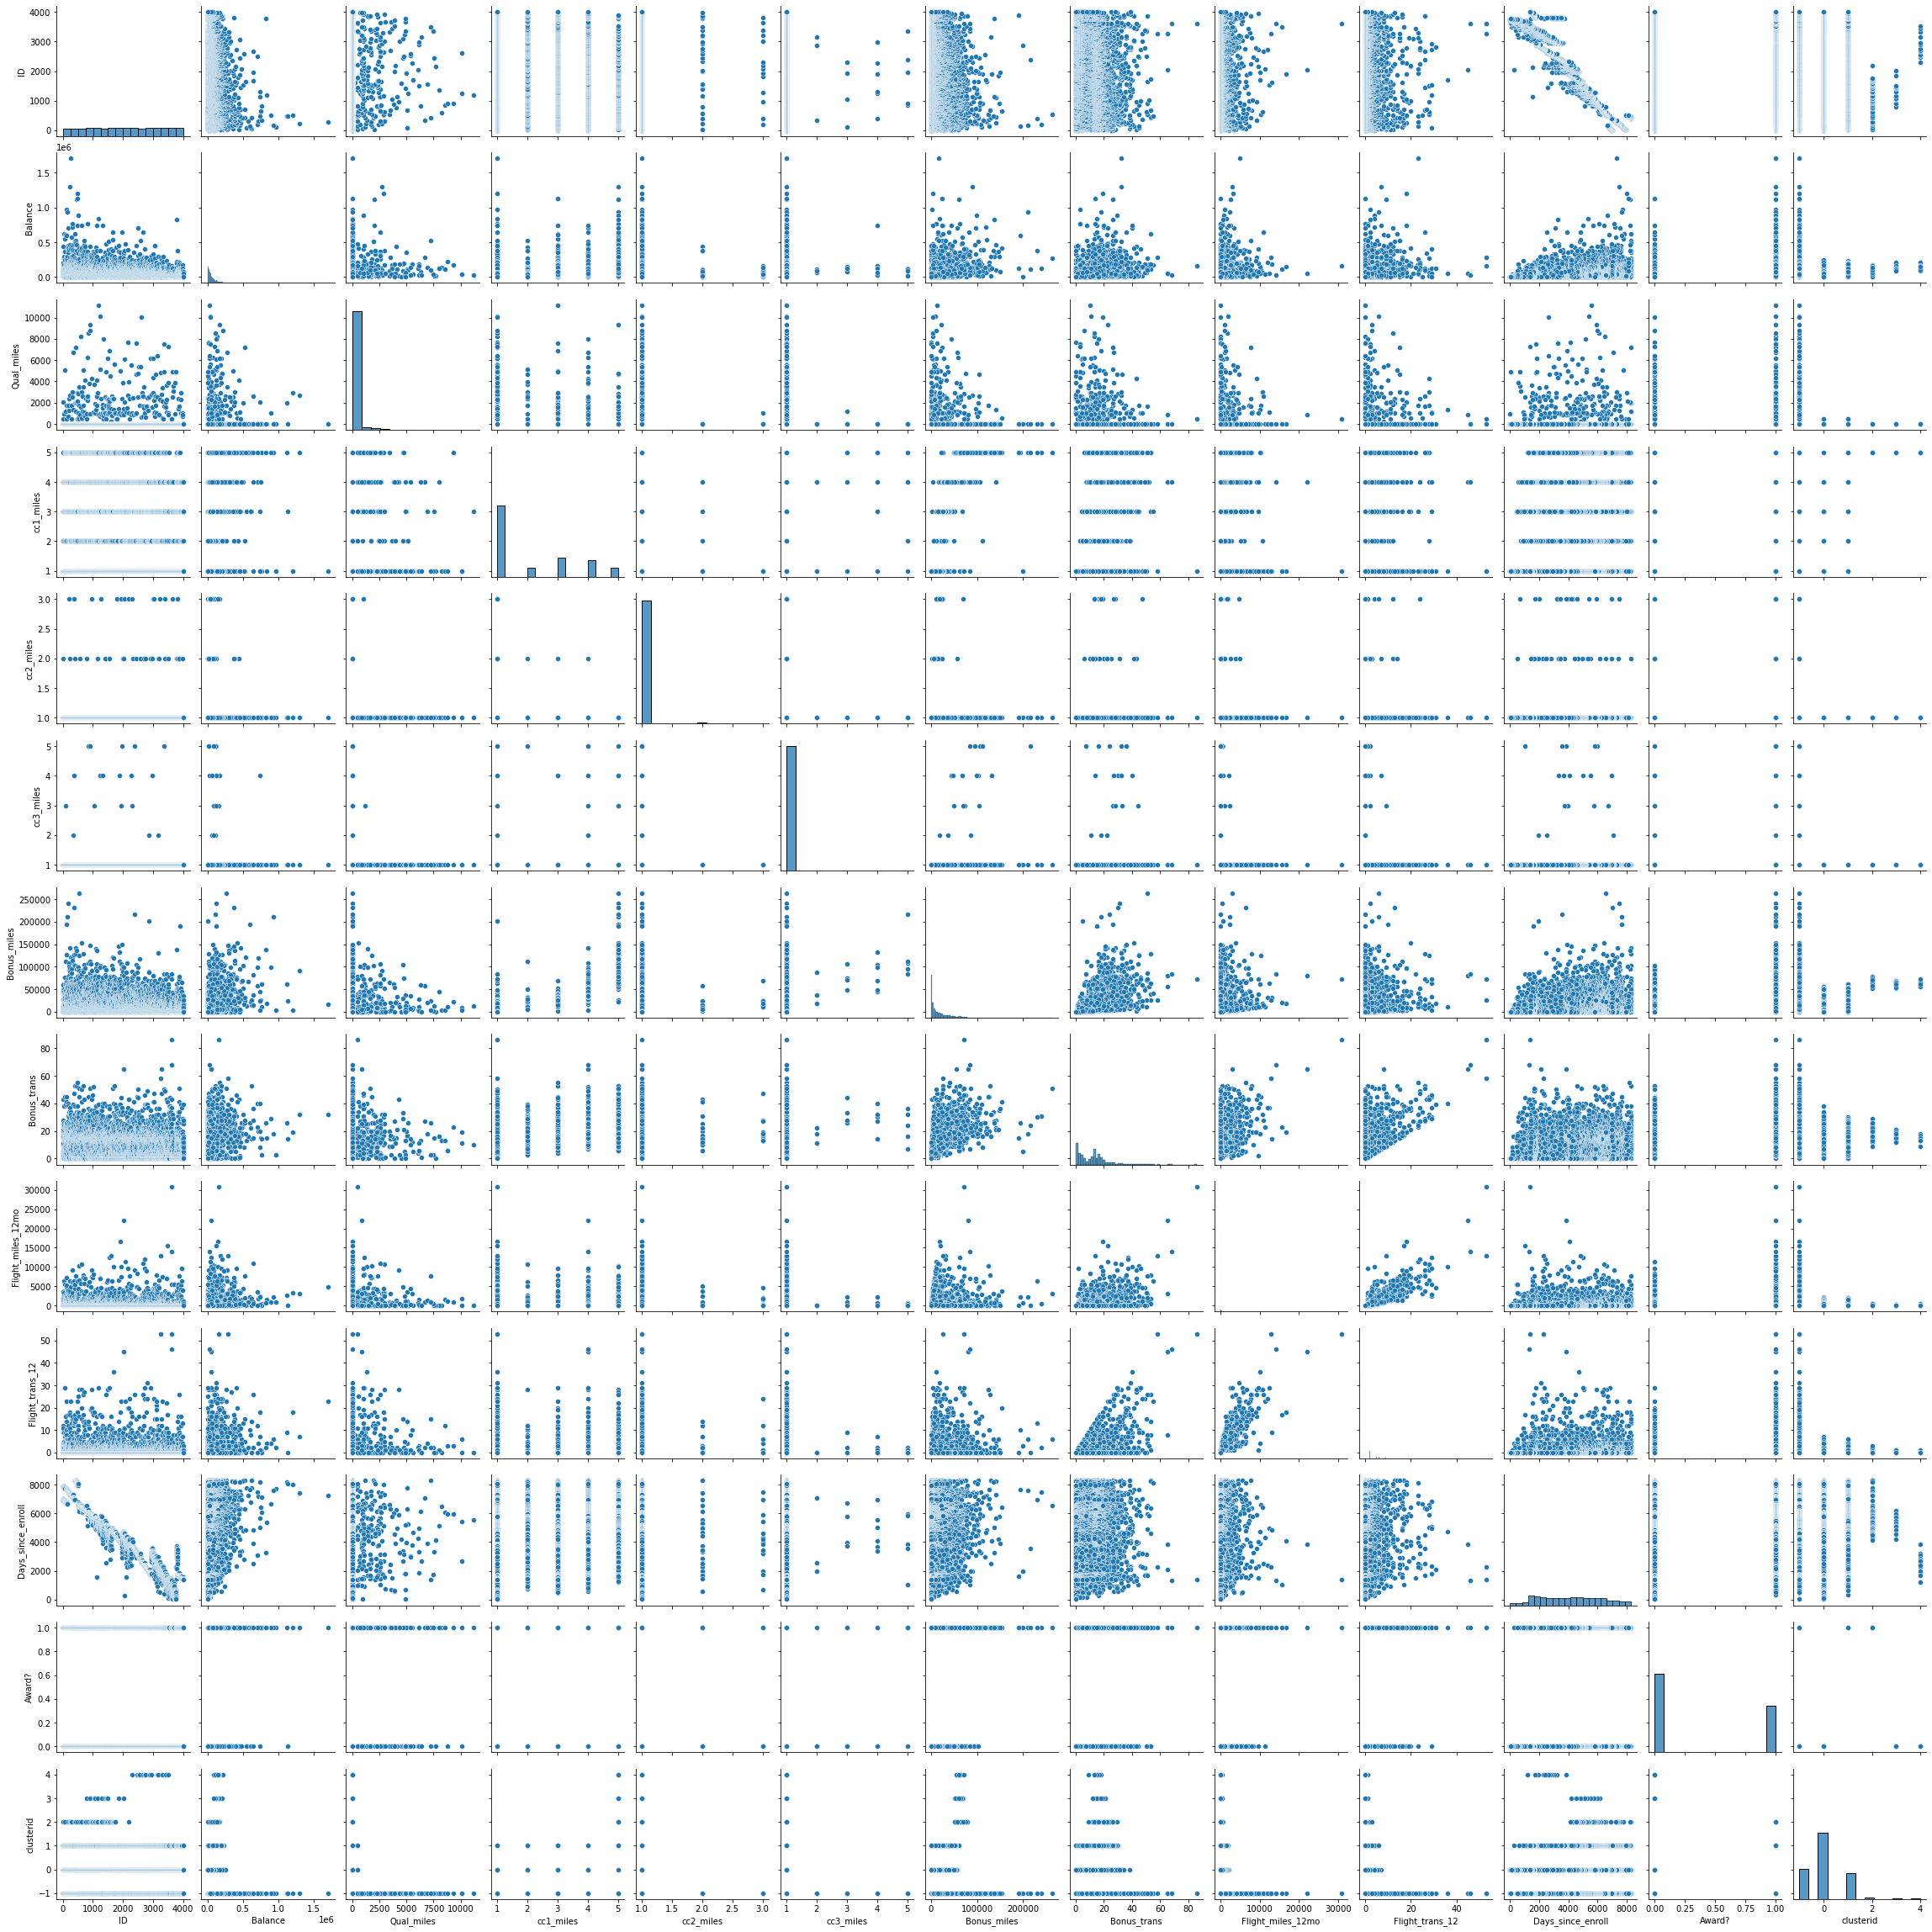

In [57]:
sns.pairplot(airline_new)